In [ ]:
import pandas as pd

# File paths
order_file_path = '/content/ORDER.csv'
promotion_file_path = '/content/PROMOTIONAL_PLAN.csv'
user_registration_file_path = '/content/USER_REGISTRATION.csv'

# Load the datasets
order_df = pd.read_csv(order_file_path)
promotion_df = pd.read_csv(promotion_file_path)
user_registration_df = pd.read_csv(user_registration_file_path)

# Display the first few rows of each dataset
print(order_df.head())
print(promotion_df.head())
print(user_registration_df.head())


    ORDER_ID USER_ID  PROMO_ID  ORDER_DATE  ORDER_SEQ REDEMPTION_DATE  \
0  OID000001  R00443      9999  14-11-2018          1             NaN   
1  OID000002  R01941      9999  17-11-2018          1             NaN   
2  OID000003  R03612      9999  09-12-2018          1             NaN   
3  OID000004  R04641      9999  10-01-2019          1             NaN   
4  OID000005  R02283      9999  15-01-2019          1             NaN   

  VALIDITY_TILL_DATE ORDER_STAUS  
0         05-09-2020      CLOSED  
1         03-09-2022      CLOSED  
2         07-10-2021      CLOSED  
3         19-11-2019      CLOSED  
4         28-09-2019      CLOSED  
   PROMO_ID          PROMO_PLAN PROMO_OFFER_TYPE SUBSCRIPTION_TYPE  \
0      9999  STANDARD NON PROMO            BASIC    NON PROMO PLAN   
1      8323              ROSSAL             FREE        PROMO PLAN   
2      8731                2K24   PERCENTAGE OFF        PROMO PLAN   
3      2949        BLACK FRIDAY   PERCENTAGE OFF        PROMO PLAN   
4

In [ ]:
# Check for missing values and data types
print(order_df.info())
print(promotion_df.info())
print(user_registration_df.info())

# Check for unique values in key columns
print(order_df['USER_ID'].nunique(), order_df['ORDER_ID'].nunique())
print(promotion_df['PROMO_ID'].nunique())
print(user_registration_df['User Id'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ORDER_ID            3644 non-null   object
 1   USER_ID             3644 non-null   object
 2   PROMO_ID            3644 non-null   int64 
 3   ORDER_DATE          3644 non-null   object
 4   ORDER_SEQ           3644 non-null   int64 
 5   REDEMPTION_DATE     1978 non-null   object
 6   VALIDITY_TILL_DATE  3644 non-null   object
 7   ORDER_STAUS         3644 non-null   object
dtypes: int64(2), object(6)
memory usage: 227.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PROMO_ID             12 non-null     int64 
 1   PROMO_PLAN           12 non-null     object
 2   PROMO_OFFER_TYPE     12 non-null     object
 3   SUBSC

In [ ]:
# Convert date columns to datetime
order_df['ORDER_DATE'] = pd.to_datetime(order_df['ORDER_DATE'], format='%d-%m-%Y')
order_df['VALIDITY_TILL_DATE'] = pd.to_datetime(order_df['VALIDITY_TILL_DATE'], format='%d-%m-%Y')
order_df['REDEMPTION_DATE'] = pd.to_datetime(order_df['REDEMPTION_DATE'], format='%d-%m-%Y', errors='coerce')

# Extract Active_Month from ORDER_DATE
order_df['Active_Month'] = order_df['ORDER_DATE'].dt.to_period('M')

# Extract Promo_Activation_Month and Promo_Ending_Month
order_df['Promo_Activation_Month'] = order_df['REDEMPTION_DATE'].dt.to_period('M')
order_df['Promo_Ending_Month'] = order_df['VALIDITY_TILL_DATE'].dt.to_period('M')

# Display the updated order dataframe
print(order_df.head())


    ORDER_ID USER_ID  PROMO_ID ORDER_DATE  ORDER_SEQ REDEMPTION_DATE  \
0  OID000001  R00443      9999 2018-11-14          1             NaT   
1  OID000002  R01941      9999 2018-11-17          1             NaT   
2  OID000003  R03612      9999 2018-12-09          1             NaT   
3  OID000004  R04641      9999 2019-01-10          1             NaT   
4  OID000005  R02283      9999 2019-01-15          1             NaT   

  VALIDITY_TILL_DATE ORDER_STAUS Active_Month Promo_Activation_Month  \
0         2020-09-05      CLOSED      2018-11                    NaT   
1         2022-09-03      CLOSED      2018-11                    NaT   
2         2021-10-07      CLOSED      2018-12                    NaT   
3         2019-11-19      CLOSED      2019-01                    NaT   
4         2019-09-28      CLOSED      2019-01                    NaT   

  Promo_Ending_Month  
0            2020-09  
1            2022-09  
2            2021-10  
3            2019-11  
4            2019-0

In [ ]:
# Merge order and promotion data
order_promo_df = pd.merge(order_df, promotion_df, left_on='PROMO_ID', right_on='PROMO_ID', how='left')

# Merge with user registration data
final_df = pd.merge(order_promo_df, user_registration_df, left_on='USER_ID', right_on='User Id', how='left')

# Drop unnecessary columns
final_df.drop(columns=['User Id', 'Full Name'], inplace=True)

# Display the merged dataframe
print(final_df.head())


    ORDER_ID USER_ID  PROMO_ID ORDER_DATE  ORDER_SEQ REDEMPTION_DATE  \
0  OID000001  R00443      9999 2018-11-14          1             NaT   
1  OID000002  R01941      9999 2018-11-17          1             NaT   
2  OID000003  R03612      9999 2018-12-09          1             NaT   
3  OID000004  R04641      9999 2019-01-10          1             NaT   
4  OID000005  R02283      9999 2019-01-15          1             NaT   

  VALIDITY_TILL_DATE ORDER_STAUS Active_Month Promo_Activation_Month  ...  \
0         2020-09-05      CLOSED      2018-11                    NaT  ...   
1         2022-09-03      CLOSED      2018-11                    NaT  ...   
2         2021-10-07      CLOSED      2018-12                    NaT  ...   
3         2019-11-19      CLOSED      2019-01                    NaT  ...   
4         2019-09-28      CLOSED      2019-01                    NaT  ...   

           PROMO_PLAN PROMO_OFFER_TYPE SUBSCRIPTION_TYPE BASE PRICE  \
0  STANDARD NON PROMO            

In [ ]:
# Define cohorts based on the first subscription month
final_df['Cohort_Month'] = final_df.groupby('USER_ID')['ORDER_DATE'].transform('min').dt.to_period('M')

# Display the updated dataframe with Cohort_Month
print(final_df[['USER_ID', 'ORDER_DATE', 'Cohort_Month']].head())


  USER_ID ORDER_DATE Cohort_Month
0  R00443 2018-11-14      2018-11
1  R01941 2018-11-17      2018-11
2  R03612 2018-12-09      2018-12
3  R04641 2019-01-10      2019-01
4  R02283 2019-01-15      2019-01


In [ ]:
# Check the final dataframe structure and missing values
print(final_df.info())
print(final_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ORDER_ID                3644 non-null   object        
 1   USER_ID                 3644 non-null   object        
 2   PROMO_ID                3644 non-null   int64         
 3   ORDER_DATE              3644 non-null   datetime64[ns]
 4   ORDER_SEQ               3644 non-null   int64         
 5   REDEMPTION_DATE         1978 non-null   datetime64[ns]
 6   VALIDITY_TILL_DATE      3644 non-null   datetime64[ns]
 7   ORDER_STAUS             3644 non-null   object        
 8   Active_Month            3644 non-null   period[M]     
 9   Promo_Activation_Month  1978 non-null   period[M]     
 10  Promo_Ending_Month      3644 non-null   period[M]     
 11  PROMO_PLAN              3644 non-null   object        
 12  PROMO_OFFER_TYPE        3644 non-null   object  

In [ ]:
# Step 2: Calculate the retention table
cohort_data = final_df.groupby(['Cohort_Month', 'Active_Month']).agg({'USER_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Active_Month', values='USER_ID')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is the combined dataframe from Task 1

# Define cohorts based on the first subscription month
final_df['Cohort_Month'] = final_df.groupby('USER_ID')['ORDER_DATE'].transform('min').dt.to_period('M')

# Calculate the month offset relative to the cohort start
final_df['Active_Month_Offset'] = ((final_df['ORDER_DATE'].dt.year - final_df['Cohort_Month'].dt.year) * 12 +
                                   (final_df['ORDER_DATE'].dt.month - final_df['Cohort_Month'].dt.month))

# Display the first few rows to verify the calculations
print(final_df[['USER_ID', 'ORDER_DATE', 'Cohort_Month', 'Active_Month_Offset']].head())


  USER_ID ORDER_DATE Cohort_Month  Active_Month_Offset
0  R00443 2018-11-14      2018-11                    0
1  R01941 2018-11-17      2018-11                    0
2  R03612 2018-12-09      2018-12                    0
3  R04641 2019-01-10      2019-01                    0
4  R02283 2019-01-15      2019-01                    0


In [ ]:
# Calculate cohort sizes
cohort_sizes = cohort_pivot.iloc[:, 0]

Active_Month_Offset     0    6     7     8      9     10
Cohort_Month                                            
2018-11              100.0  0.0   0.0   0.0   50.0  50.0
2018-12              100.0  0.0   0.0   0.0  100.0   0.0
2019-01              100.0  0.0   0.0  25.0   50.0  25.0
2019-02              100.0  0.0   0.0  50.0   50.0   0.0
2019-03              100.0  0.0  25.0  25.0   37.5  12.5


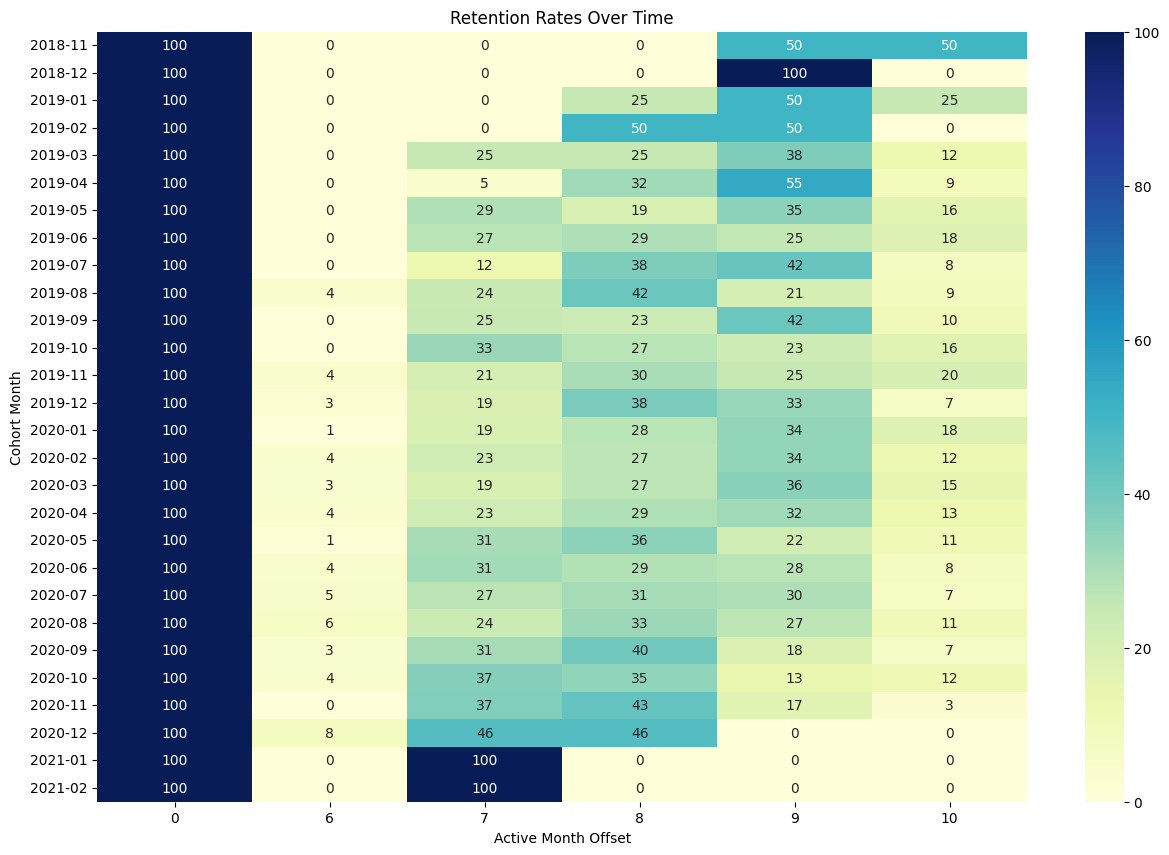

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert necessary columns to datetime and period
final_df['ORDER_DATE'] = pd.to_datetime(final_df['ORDER_DATE'])
final_df['VALIDITY_TILL_DATE'] = pd.to_datetime(final_df['VALIDITY_TILL_DATE'])
final_df['REDEMPTION_DATE'] = pd.to_datetime(final_df['REDEMPTION_DATE'], errors='coerce')
final_df['Cohort_Month'] = pd.to_datetime(final_df['Cohort_Month'].astype(str)).dt.to_period('M')
final_df['Active_Month'] = pd.to_datetime(final_df['Active_Month'].astype(str)).dt.to_period('M')
final_df['Promo_Activation_Month'] = pd.to_datetime(final_df['Promo_Activation_Month'].astype(str), errors='coerce').dt.to_period('M')
final_df['Promo_Ending_Month'] = pd.to_datetime(final_df['Promo_Ending_Month'].astype(str)).dt.to_period('M')

# Define cohorts based on the first subscription month
final_df['Cohort_Month'] = final_df.groupby('USER_ID')['ORDER_DATE'].transform('min').dt.to_period('M')

# Calculate the month offset relative to the cohort start
final_df['Active_Month_Offset'] = ((final_df['ORDER_DATE'].dt.year - final_df['Cohort_Month'].dt.year) * 12 +
                                   (final_df['ORDER_DATE'].dt.month - final_df['Cohort_Month'].dt.month))

# Calculate the number of active users in each cohort for each month
cohort_data = final_df.groupby(['Cohort_Month', 'Active_Month_Offset']).agg({'USER_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Active_Month_Offset', values='USER_ID')

# Calculate cohort sizes
cohort_sizes = cohort_pivot.iloc[:, 0]

# Calculate retention rates
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

# Fill NaN values with 0 for better visualization
retention_matrix = retention_matrix.fillna(0)

# Display the retention matrix to verify the calculations
print(retention_matrix.head())

# Plot the retention heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Retention Rates Over Time')
plt.xlabel('Active Month Offset')
plt.ylabel('Cohort Month')
plt.show()


Average Order Value: 210.52689352360045
Number of Repeat Sales: 2.0
Average Retention Time: 33.333333333333336
Customer Lifetime Value (CLTV): 14035.126234906698


<ipython-input-23-d1eb64dcf6f6>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cltv_by_cohort, x='Cohort_Month', y=0, palette='viridis')


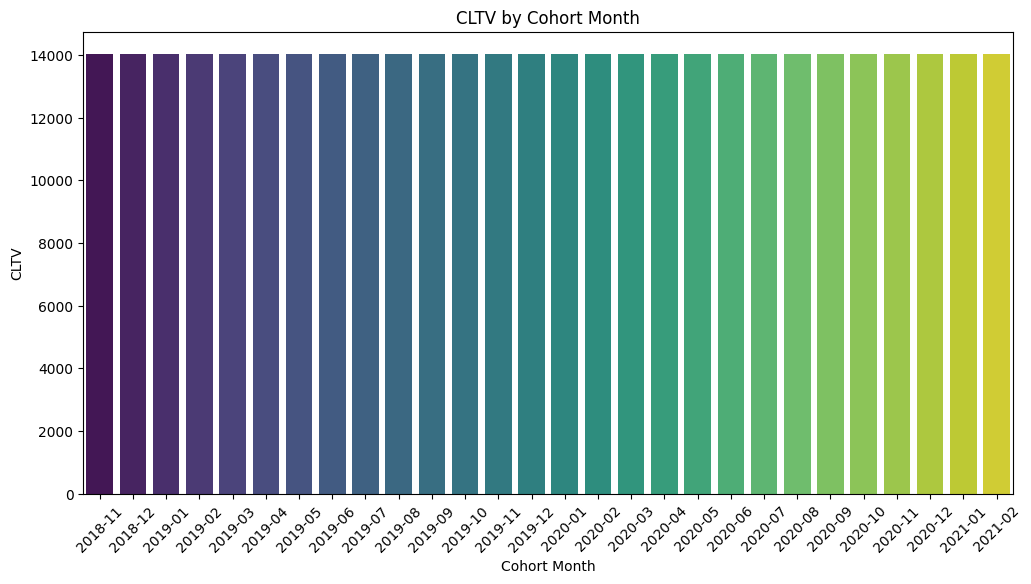

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Calculate retention rates
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

# Fill NaN values with 0 for better visualization
retention_matrix = retention_matrix.fillna(0)

# Calculate the average order value
average_order_value = final_df['EFFECTIVE_PRICE'].mean()

# Calculate the number of repeat sales
repeat_sales = final_df.groupby('USER_ID').size().mean()

# Calculate the average retention time (in months)
retention_time = retention_matrix.mean(axis=1).mean()

# Calculate CLTV
cltv = average_order_value * repeat_sales * retention_time

print(f"Average Order Value: {average_order_value}")
print(f"Number of Repeat Sales: {repeat_sales}")
print(f"Average Retention Time: {retention_time}")
print(f"Customer Lifetime Value (CLTV): {cltv}")

# Optional: Visualize CLTV by cohort
cltv_by_cohort = retention_matrix.mean(axis=1) * average_order_value * repeat_sales
cltv_by_cohort = cltv_by_cohort.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cltv_by_cohort, x='Cohort_Month', y=0, palette='viridis')
plt.title('CLTV by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('CLTV')
plt.xticks(rotation=45)
plt.show()


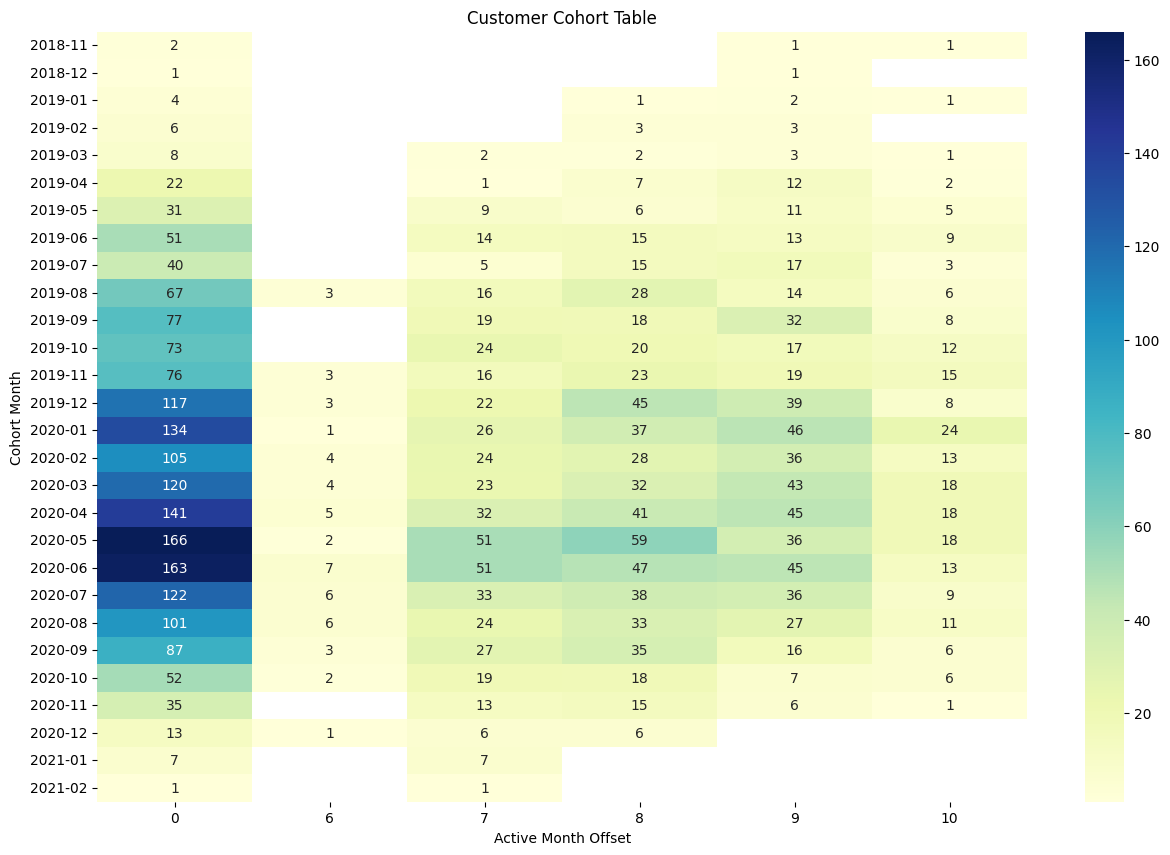

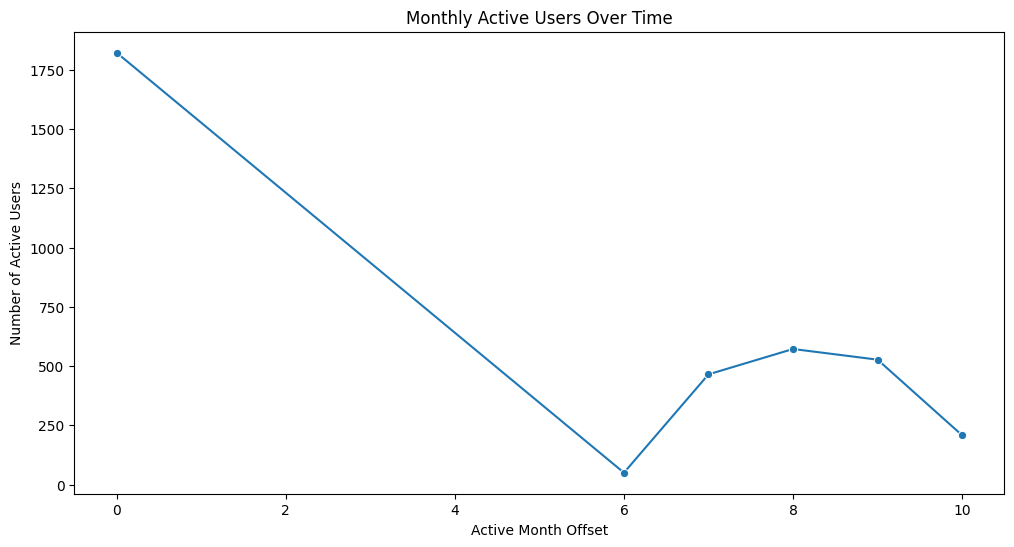

In [ ]:


# Plot the cohort table
plt.figure(figsize=(15, 10))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Customer Cohort Table')
plt.xlabel('Active Month Offset')
plt.ylabel('Cohort Month')
plt.show()

# Plot trend line showing the user count over the months and years
monthly_active_users = final_df.groupby(['Cohort_Month', 'Active_Month_Offset']).agg({'USER_ID': 'nunique'}).reset_index()
monthly_active_users = monthly_active_users.groupby(['Active_Month_Offset']).agg({'USER_ID': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_users, x='Active_Month_Offset', y='USER_ID', marker='o')
plt.title('Monthly Active Users Over Time')
plt.xlabel('Active Month Offset')
plt.ylabel('Number of Active Users')
plt.show()


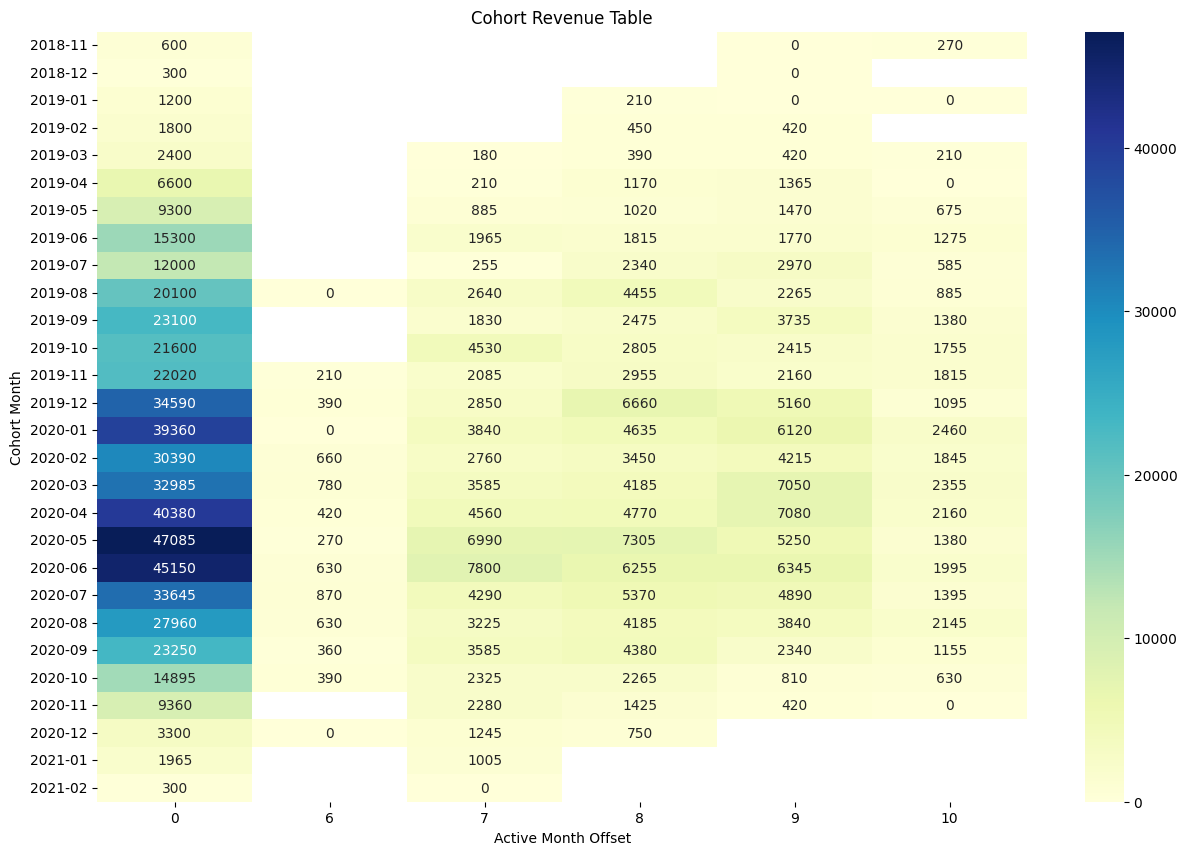

<ipython-input-25-f2ca7cf394be>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cltv_by_cohort_gross, x='Cohort_Month', y=0, palette='viridis')


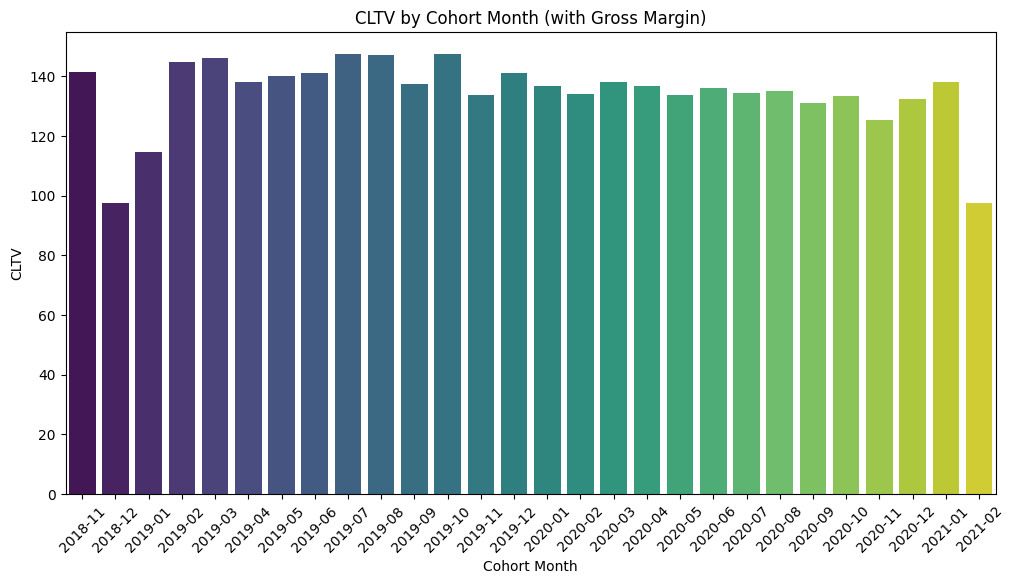

In [ ]:

# Calculate Total Cohort Revenue
final_df['MONTHLY_REVENUE'] = final_df['EFFECTIVE_PRICE']
cohort_revenue = final_df.groupby(['Cohort_Month', 'Active_Month_Offset']).agg({'MONTHLY_REVENUE': 'sum'}).reset_index()
cohort_revenue_pivot = cohort_revenue.pivot_table(index='Cohort_Month', columns='Active_Month_Offset', values='MONTHLY_REVENUE')

# Plot the cohort revenue table
plt.figure(figsize=(15, 10))
sns.heatmap(cohort_revenue_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Cohort Revenue Table')
plt.xlabel('Active Month Offset')
plt.ylabel('Cohort Month')
plt.show()

# Calculate CLTV by cohort
cltv_by_cohort = cohort_revenue_pivot.sum(axis=1) / cohort_pivot.sum(axis=1)

# Include gross margin (65%)
gross_margin = 0.65
cltv_by_cohort_gross = cltv_by_cohort * gross_margin

# Plot CLTV by cohort
cltv_by_cohort_gross = cltv_by_cohort_gross.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cltv_by_cohort_gross, x='Cohort_Month', y=0, palette='viridis')
plt.title('CLTV by Cohort Month (with Gross Margin)')
plt.xlabel('Cohort Month')
plt.ylabel('CLTV')
plt.xticks(rotation=45)
plt.show()

## **Customer Lifetime Value (CLTV)**

In [ ]:
import pandas as pd
import numpy as np

# Load data from CSV files
order_df = pd.read_csv('/content/ORDER.csv')
promo_df = pd.read_csv('/content/PROMOTIONAL_PLAN.csv')
user_df = pd.read_csv('/content/USER_REGISTRATION.csv')

# Convert relevant columns to datetime with correct format
order_df['ORDER_DATE'] = pd.to_datetime(order_df['ORDER_DATE'], dayfirst=True)
order_df['REDEMPTION_DATE'] = pd.to_datetime(order_df['REDEMPTION_DATE'], errors='coerce', dayfirst=True)
order_df['VALIDITY_TILL_DATE'] = pd.to_datetime(order_df['VALIDITY_TILL_DATE'], dayfirst=True)

# Create additional columns for analysis
order_df['Active_Month'] = order_df['ORDER_DATE'].dt.to_period('M')
order_df['Promo_Activation_Month'] = order_df['REDEMPTION_DATE'].dt.to_period('M')
order_df['Promo_Ending_Month'] = order_df['VALIDITY_TILL_DATE'].dt.to_period('M')
order_df['Cohort_Month'] = order_df['ORDER_DATE'].dt.to_period('M')

# Merge dataframes to combine the required datasets
merged_df = order_df.merge(promo_df, left_on='PROMO_ID', right_on='PROMO_ID', how='left')
merged_df = merged_df.merge(user_df, left_on='USER_ID', right_on='User Id', how='left')

# Calculate the active months for each user
merged_df['ACTIVE_MONTHS'] = ((merged_df['VALIDITY_TILL_DATE'].dt.year - merged_df['ORDER_DATE'].dt.year) * 12
                              + (merged_df['VALIDITY_TILL_DATE'].dt.month - merged_df['ORDER_DATE'].dt.month))

# Calculate Customer LTV
merged_df['Customer LTV'] = merged_df['EFFECTIVE_PRICE'] * merged_df['ACTIVE_MONTHS']

# Select and rename columns to match the required format
final_table = merged_df[['ORDER_ID', 'USER_ID', 'PROMO_ID', 'ORDER_DATE', 'REDEMPTION_DATE', 'EFFECTIVE_PRICE', 'Cohort_Month', 'ACTIVE_MONTHS', 'Customer LTV']]
final_table.columns = ['ORDER_ID', 'USER_ID', 'PROMO_ID', 'SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_START', 'MONTHLY_PAYMENT', 'COHORT', 'ACTIVE_MONTHS', 'Customer LTV']

# Display the final table
print(final_table.head())
# Save to CSV for easier handling if needed
final_table.to_csv('final_table.csv', index=False)


    ORDER_ID USER_ID  PROMO_ID SUBSCRIPTION_START_DATE SUBSCRIPTION_START  \
0  OID000001  R00443      9999              2018-11-14                NaT   
1  OID000002  R01941      9999              2018-11-17                NaT   
2  OID000003  R03612      9999              2018-12-09                NaT   
3  OID000004  R04641      9999              2019-01-10                NaT   
4  OID000005  R02283      9999              2019-01-15                NaT   

   MONTHLY_PAYMENT   COHORT  ACTIVE_MONTHS  Customer LTV  
0              300  2018-11             22          6600  
1              300  2018-11             46         13800  
2              300  2018-12             34         10200  
3              300  2019-01             10          3000  
4              300  2019-01              8          2400  


In [ ]:
# Calculate the retention table
cohort_data = final_df.groupby(['Cohort_Month', 'Active_Month']).agg({'USER_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Active_Month', values='USER_ID')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100
retention_matrix = retention_matrix.fillna(0)


In [ ]:
retention_matrix

Active_Month,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohort_Month,,,,,,,,,,,,,,,,,,,,,
2018-11,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate the overall average month retention
overall_average_retention = retention_matrix.mean().mean()
print("Overall Average Month Retention:", overall_average_retention)

Overall Average Month Retention: 0.20408163265306123


In [ ]:
# Calculate the cohort table
cohort_data = final_df.groupby(['Cohort_Month', 'Active_Month']).agg({'USER_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Active_Month', values='USER_ID')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100
retention_matrix = retention_matrix.fillna(0)

# Identify the fiscal year 2019
fiscal_year_2019 = retention_matrix.loc['2019-01':'2019-12']

# Find the 14th month active users
active_users_14th_month = fiscal_year_2019.iloc[:, 13].sum()  # 13 because the index starts from 0
print("Active Users at 14th Month Active for Fiscal year 2019:", active_users_14th_month)

Active Users at 14th Month Active for Fiscal year 2019: 0.0


In [ ]:

# Identify the fiscal year 2021
fiscal_year_2021 = retention_matrix.loc['2021-01':'2021-12']

# Find the percentage of active users in the 9th month
active_users_9th_month_percentage = fiscal_year_2021.iloc[:, 8].mean()  # 8 because the index starts from 0
print("Percentage of users still active in the 9th month of fiscal year 2021:", active_users_9th_month_percentage)

Percentage of users still active in the 9th month of fiscal year 2021: 0.0


In [ ]:

# Convert date columns to datetime
final_df['ORDER_DATE'] = pd.to_datetime(final_df['ORDER_DATE'], dayfirst=True)
final_df['REDEMPTION_DATE'] = pd.to_datetime(final_df['REDEMPTION_DATE'], errors='coerce', dayfirst=True)
final_df['VALIDITY_TILL_DATE'] = pd.to_datetime(final_df['VALIDITY_TILL_DATE'], dayfirst=True)

# Create additional columns for analysis
final_df['Cohort_Month'] = final_df['ORDER_DATE'].dt.to_period('M')
final_df['Active_Month'] = final_df['VALIDITY_TILL_DATE'].dt.to_period('M')
final_df['Promo_Activation_Month'] = final_df['REDEMPTION_DATE'].dt.to_period('M')
final_df['Promo_Ending_Month'] = final_df['VALIDITY_TILL_DATE'].dt.to_period('M')

# Calculate the Cohort Index
final_df['Cohort_Index'] = (final_df['Active_Month'] - final_df['Cohort_Month']).apply(lambda x: x.n)

# Calculate the retention rates per country
country_retention_data = final_df.groupby(['Country', 'Cohort_Month', 'Cohort_Index']).agg({'USER_ID': 'nunique'}).reset_index()
country_retention_pivot = country_retention_data.pivot_table(index=['Country', 'Cohort_Month'], columns='Cohort_Index', values='USER_ID')
country_cohort_size = country_retention_pivot.iloc[:, 0]

# Calculate the retention matrix
country_retention_matrix = country_retention_pivot.divide(country_cohort_size, axis=0) * 100
country_retention_matrix = country_retention_matrix.fillna(0)

# Calculate the average monthly retention rate for each country
average_monthly_retention = country_retention_matrix.groupby('Country').mean().mean(axis=1)

# Identify the country with the highest average monthly retention rate
highest_avg_retention_country = average_monthly_retention.idxmax()
highest_avg_retention_rate = average_monthly_retention.max()

print(f"The country with the highest average monthly retention rate is {highest_avg_retention_country} with a retention rate of {highest_avg_retention_rate:.2f}%")


The country with the highest average monthly retention rate is United States with a retention rate of 11.51%


In [ ]:
# Convert date columns to datetime
final_df['ORDER_DATE'] = pd.to_datetime(final_df['ORDER_DATE'], dayfirst=True)
final_df['REDEMPTION_DATE'] = pd.to_datetime(final_df['REDEMPTION_DATE'], errors='coerce', dayfirst=True)
final_df['VALIDITY_TILL_DATE'] = pd.to_datetime(final_df['VALIDITY_TILL_DATE'], dayfirst=True)

# Create additional columns for analysis
final_df['Cohort_Month'] = final_df['ORDER_DATE'].dt.to_period('M')
final_df['Active_Month'] = final_df['VALIDITY_TILL_DATE'].dt.to_period('M')

# Calculate the Cohort Index
final_df['Cohort_Index'] = (final_df['Active_Month'] - final_df['Cohort_Month']).apply(lambda x: x.n)

# Calculate the retention rates
cohort_data = final_df.groupby(['Cohort_Month', 'Cohort_Index']).agg({'USER_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Cohort_Index', values='USER_ID')
cohort_size = cohort_pivot.iloc[:, 0]

# Calculate the retention matrix
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100
retention_matrix = retention_matrix.fillna(0)

# Calculate the overall average month retention
overall_average_month_retention = retention_matrix.mean().mean()

print(f"The overall average month retention is {overall_average_month_retention:.2f}%")

The overall average month retention is 16.82%
